In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\Timeseries\exchange_rate.csv")
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [19]:
data.columns

Index(['date', 'Ex_rate'], dtype='object')

In [20]:
data.size

15176

In [21]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [22]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [23]:
data.index = pd.to_datetime(data.date)
data = data.drop(['date'], axis=1)

In [11]:
data.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2010-01-10', '2010-02-10', '2010-03-10', '2010-04-10',
               '2010-05-10', '2010-06-10', '2010-07-10', '2010-08-10',
               '2010-09-10', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=7588, freq=None)

In [44]:
data.columns = ['Production']

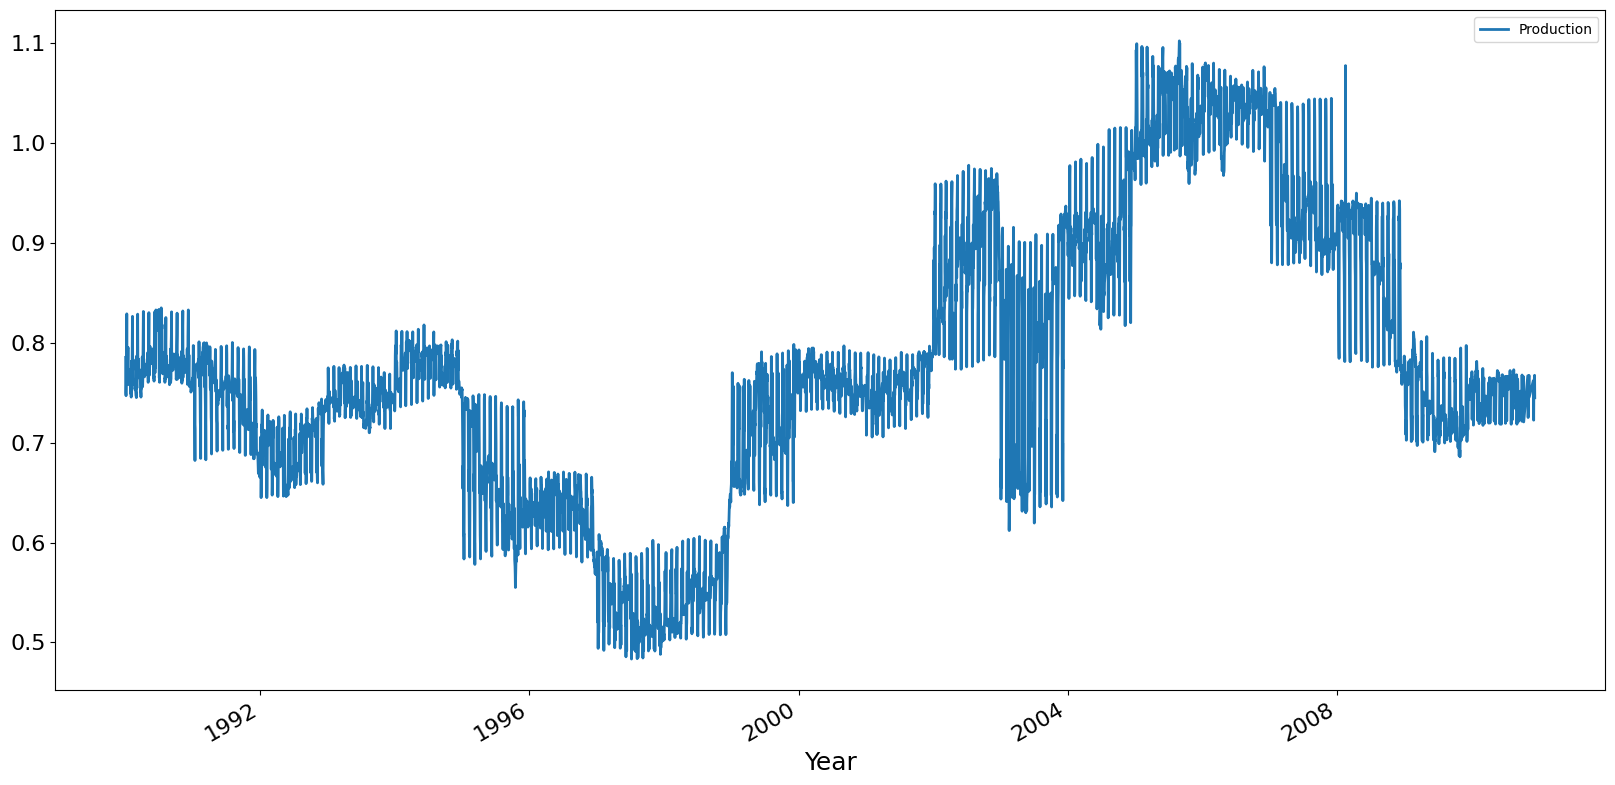

In [46]:
data.plot(figsize=(20,10), linewidth=2, fontsize=16)
plt.xlabel('Year', fontsize=18);
plt.show()

In [47]:
adfuller(data['Production'])

(-1.6649941807381419,
 0.4492327353597959,
 1,
 7586,
 {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108},
 -55835.06254628545)

In [50]:
result = adfuller(data['Production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.6649941807381419
p-value: 0.4492327353597959
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


<Axes: xlabel='date'>

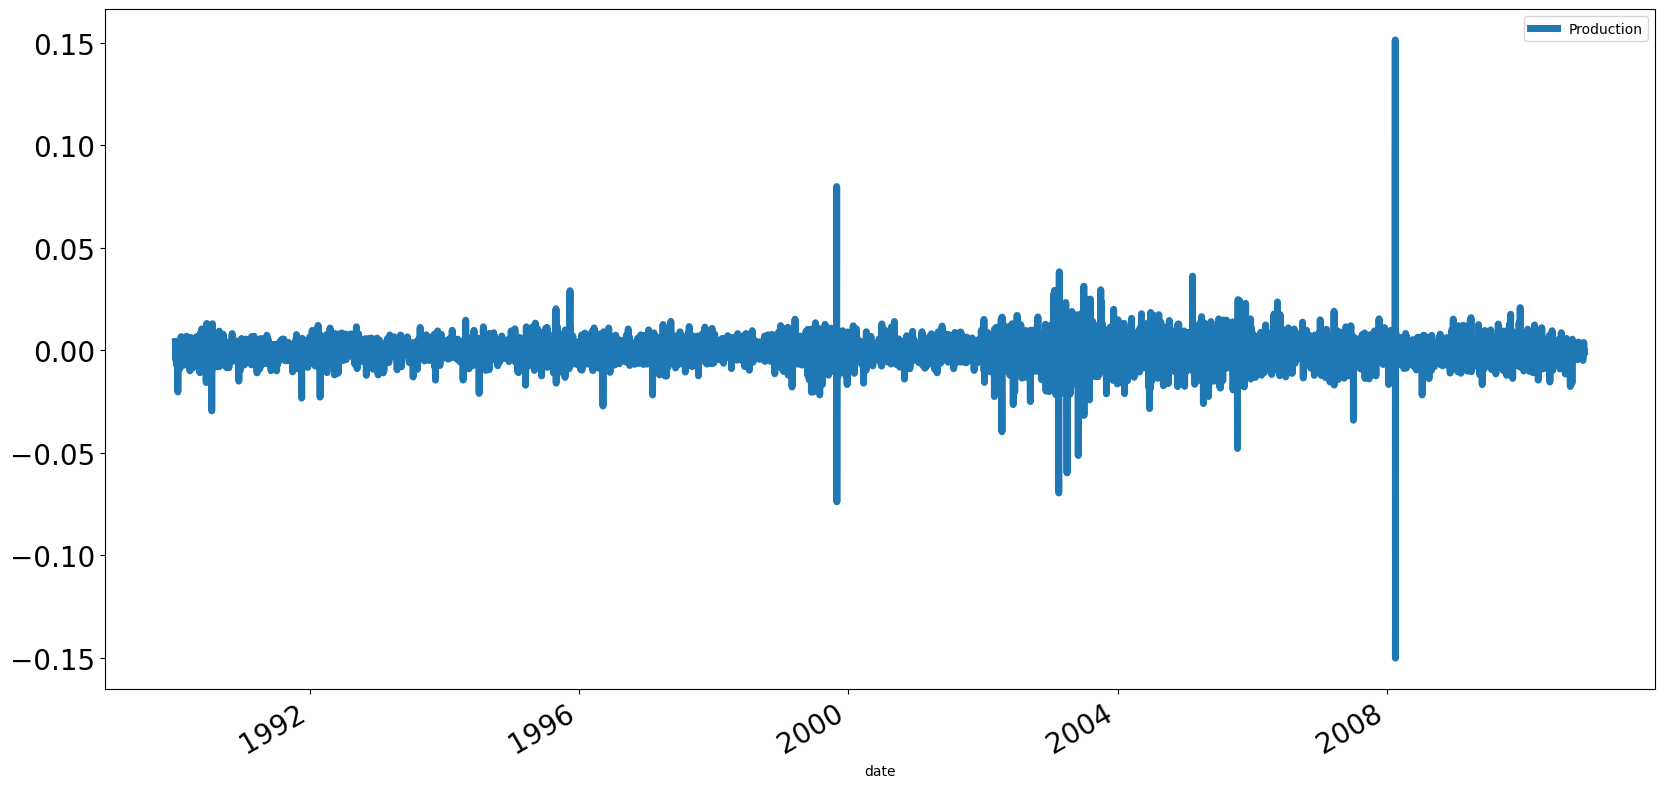

In [52]:
data.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)

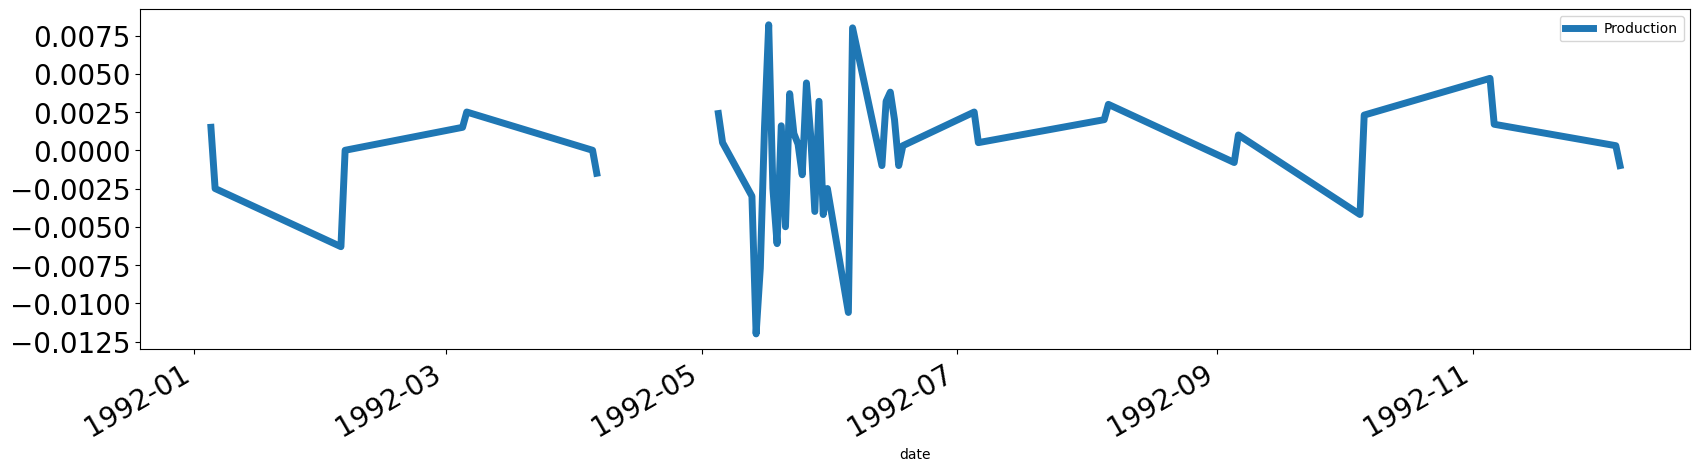

In [54]:
data2 = data.iloc[850:900] 
data2.diff().plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.show()

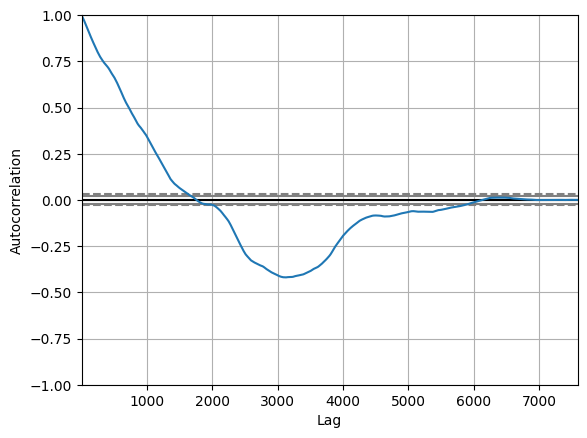

In [55]:
autocorrelation_plot(data);

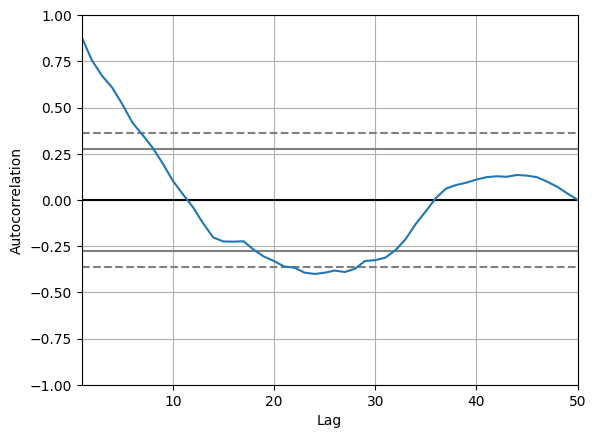

In [56]:
autocorrelation_plot(data2);

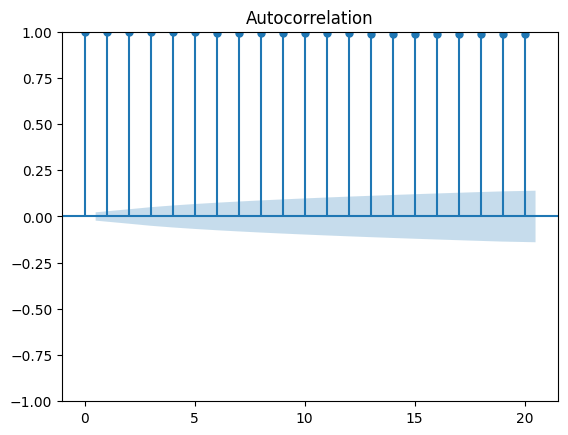

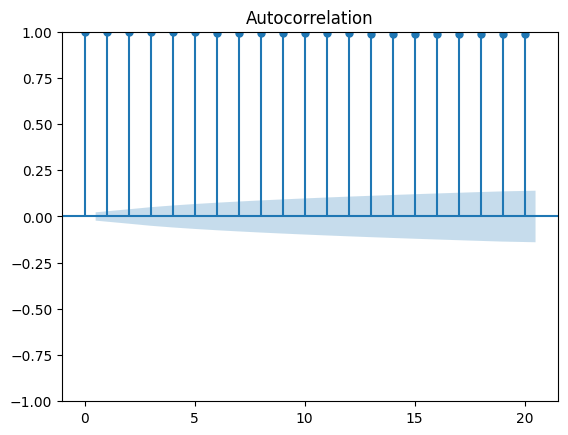

In [57]:
plot_acf(data, lags=20)

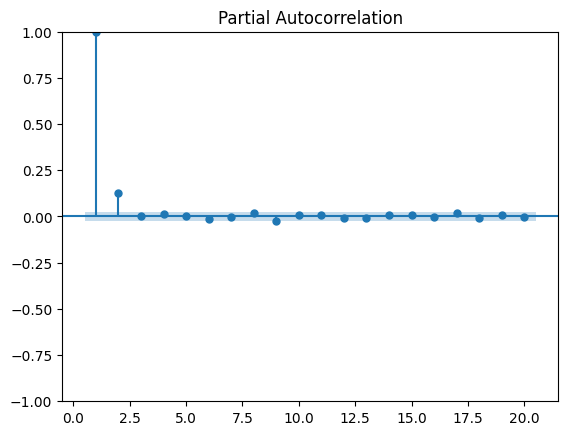

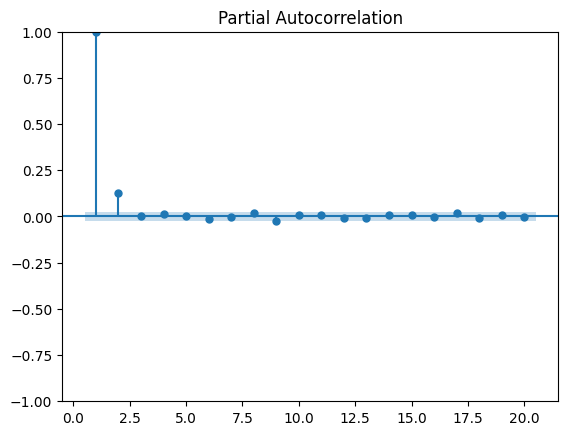

In [59]:
plot_pacf(data, zero=False, lags=20)

In [75]:
model = ARIMA(data, order=(5,1,0))
results = model.fit()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

In [76]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Tue, 23 Jul 2024   AIC                         -56099.370
Time:                        10:38:33   BIC                         -56057.765
Sample:                             0   HQIC                        -56085.091
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

<Axes: xlabel='date'>

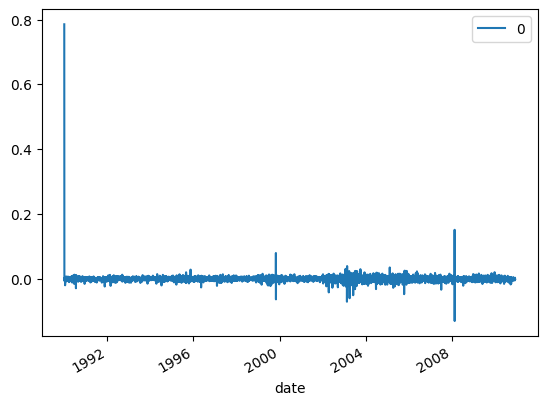

In [77]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

In [83]:
print(residuals.describe())

                 0
count  7588.000000
mean      0.000094
std       0.010829
min      -0.130212
25%      -0.002382
50%       0.000138
75%       0.002592
max       0.785500


In [84]:
returns = data.pct_change() * 100
returns = returns.dropna()
returns.tail()

,Production
date,
2010-06-10,-0.028802
2010-07-10,0.465557
2010-08-10,0.188131
2010-09-10,-0.327988
2010-10-10,0.000000


In [91]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [94]:
returns = data.pct_change() * 100
returns = returns.dropna()
returns.tail()

,Production
date,
2010-06-10,-0.028802
2010-07-10,0.465557
2010-08-10,0.188131
2010-09-10,-0.327988
2010-10-10,0.000000


In [101]:
mod = smf.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1478      0.045     -3.254      0.001      -0.237      -0.059
ma.L1          0.0172      0.046      0.378      0.705      -0.072       0.107
ar.S.L12       0.0040      0.006      0.641      0.522      -0.008       0.016
ma.S.L12      -1.0001      0.053    -18.811      0.000      -1.104      -0.896
sigma2      3.593e-05   1.99e-06     18.019      0.000     3.2e-05    3.98e-05


In [106]:
forecast_horizon = 5
forecasts = results.get_prediction(start=pd.to_datetime('2010-06-10'), dynamic=False)
forecasts